7878 - comprimento original antes da divisão
1313 - comprimento de uma unica coluna
6.0 - número de colunas

2950.0556 -999.0 74.0312 1.2737 -999.0 -999.0
2974.7444 3083.558 3103.5224


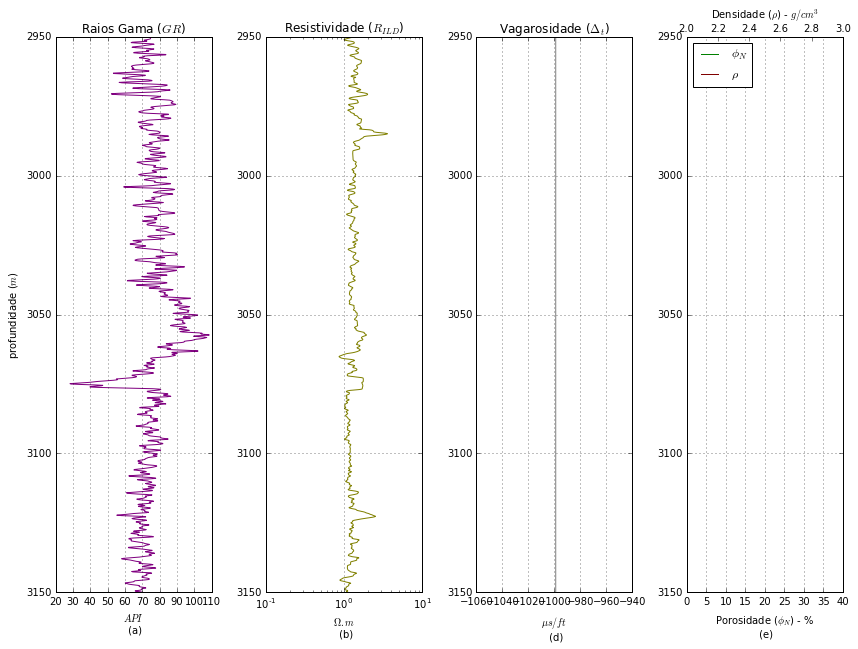

In [1]:
#
#NA24
#
%matplotlib inline
from pylab import *;import scipy as sp;import numpy as np;import matplotlib.pyplot as plt;
import matplotlib.patches as mpatches;import matplotlib.mlab as mlab;from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import make_axes_locatable;from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator
#-----------------------------------------------------#
name0 = '24';name1 = 'na'+name0;name2 = 'na-'+name0
#----------------Armazenando os Dados----------------------------------------------------#

data  = np.fromfile('../banco_de_dados_original/NA24D.dat', dtype=float, count=-1, sep='	');alph=len(data)/1313
p = int (len(data)/alph)

print (len(data),'- comprimento original antes da divisão');print (p,'- comprimento de uma unica coluna')
print (alph,'- número de colunas');data  = np.reshape(data, (len(data)/alph,alph))
#----------------------------------------As propriedades petrofisicas do poco-------------------------------------#
prof=np.array(data[:,0],float);DTP=np.array(data[:,1],float);GR=np.array(data[:,2],float)
ILD  = np.array(data[:,3],float);PHIN = np.array(data[:,4],float);RHOb = np.array(data[:,5],float)
print ();print (prof[0],DTP[0],GR[0],ILD[0],PHIN[0],RHOb[0]);print(prof[162],prof[876],prof[1007]);del(data,alph)
#-------------------------------------------------------Graficos--------------------------------------------------#
fig, (ax1, ax2, ax4, ax5) = plt.subplots(1,4);fig.suptitle('', fontsize=20);fig.set_size_inches(12, 10)
#--------------------------------------------------------------------------------------------------#
ax1.plot(GR,prof,'-',linewidth = 1,color='purple',label='$GR$');ax1.set_title(u'Raios Gama ($GR$)')
ax1.set_ylabel('profundidade ($m$)');ax1.set_xlabel('$API$ \n (a)');ax1.set_ylim(ymax=max(prof),ymin=min(prof))
ax1.invert_yaxis();ax1.grid()
#--------------------------------------------------------------------------------------------------#
ax2.semilogx(ILD,prof,'-',linewidth = 1,color='olive',label='$ILD$');ax2.set_title(u'Resistividade ($R_{ILD}$)')
ax2.set_xlabel('$\Omega.m$ \n (b)');ax2.set_ylim(ymax=max(prof),ymin=min(prof));ax2.invert_yaxis();ax2.grid()
#--------------------------------------------------------------------------------------------------#
ax4.plot(DTP ,prof,'-',linewidth = 1,color='Gray',label='$V_P$');ax4.set_title('Vagarosidade ($\Delta _t$)')   
ax4.set_xlabel('$\mu s / ft$ \n (d)');ax4.set_ylim(ymax=max(prof),ymin=min(prof));ax4.invert_yaxis();ax4.grid()
#--------------------------------------------------------------------------------------------------#
lab5 = ax5.plot(PHIN,prof,'-',linewidth = 1,color='green',label='$\phi_N$')
ax5.set_xlabel('Porosidade ($\phi_N$) - % \n (e)');ax0 = ax5.twiny()
lab0 = ax0.plot(RHOb,prof,'-',linewidth = 1,color='maroon',label='$\\rho$')
ax0.set_xlabel('Densidade ($\\rho$) - $g/cm^3$');labf = lab5+lab0
labs = [l.get_label() for l in labf];plt.legend(labf, labs, loc=2);ax5.set_ylim(ymax=max(prof),ymin=min(prof))
ax0.set_xlim(xmax=3.0,xmin=2.0);ax5.set_xlim(xmax=40.0,xmin=0.0);ax5.invert_yaxis();ax5.grid()
#--------------------------------------------------------------------------------------------------#
plt.tight_layout();plt.subplots_adjust(top=0.85);plt.show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Correções -</font></center>
<br>
<br>$\rho_b(GR,R_{ILD}) = 2.43 + 5.07GR\times10^{-4} - 1.02R_{ILD}\times10^{-2}$ - Augusto
<br>$\phi_N(GR,\rho_b) = 63.19 - 5.29GR\times 10^{-2} - 13.80\rho_b  $ - Augusto

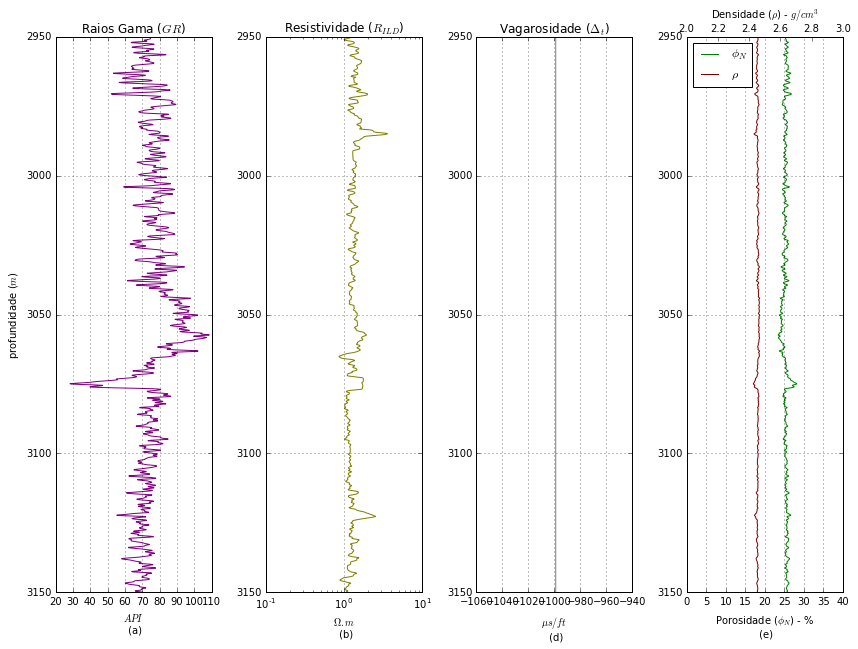

In [3]:
#------------------------------Interpolacao RHOb -999.00000 
RHOb2 = [];PHIN2 = []

for i in range (p):
    RHOb2.append(2.43 + ((5.07*(10**(-4)))*GR[i]) - ((1.02*(10**(-2))*ILD[i])))

for i in range (p):
    if RHOb[i] == -999.000:
        RHOb[i] = RHOb2[i]

for i in range (p):
    PHIN2.append(63.19 - (GR[i]*5.29*(10**(-2))) - (13.80*RHOb[i]))
    
for i in range (p):
    if PHIN[i] == -999.000:
        PHIN[i] = PHIN2[i]
#-------------------------------------------------------Graficos--------------------------------------------------#
fig, (ax1, ax2, ax4, ax5) = plt.subplots(1,4);fig.suptitle('', fontsize=20);fig.set_size_inches(12, 10)
#--------------------------------------------------------------------------------------------------#
ax1.plot(GR,prof,'-',linewidth = 1,color='purple',label='$GR$');ax1.set_title(u'Raios Gama ($GR$)')
ax1.set_ylabel('profundidade ($m$)');ax1.set_xlabel('$API$ \n (a)');ax1.set_ylim(ymax=max(prof),ymin=min(prof))
ax1.invert_yaxis();ax1.grid()
#--------------------------------------------------------------------------------------------------#
ax2.semilogx(ILD,prof,'-',linewidth = 1,color='olive',label='$ILD$');ax2.set_title(u'Resistividade ($R_{ILD}$)')
ax2.set_xlabel('$\Omega.m$ \n (b)');ax2.set_ylim(ymax=max(prof),ymin=min(prof));ax2.invert_yaxis();ax2.grid()
#--------------------------------------------------------------------------------------------------#
ax4.plot(DTP ,prof,'-',linewidth = 1,color='Gray',label='$V_P$');ax4.set_title('Vagarosidade ($\Delta _t$)')   
ax4.set_xlabel('$\mu s / ft$ \n (d)');ax4.set_ylim(ymax=max(prof),ymin=min(prof));ax4.invert_yaxis();ax4.grid()
#--------------------------------------------------------------------------------------------------#
lab5 = ax5.plot(PHIN,prof,'-',linewidth = 1,color='green',label='$\phi_N$')
ax5.set_xlabel('Porosidade ($\phi_N$) - % \n (e)');ax0 = ax5.twiny()
lab0 = ax0.plot(RHOb,prof,'-',linewidth = 1,color='maroon',label='$\\rho$')
ax0.set_xlabel('Densidade ($\\rho$) - $g/cm^3$');labf = lab5+lab0
labs = [l.get_label() for l in labf];plt.legend(labf, labs, loc=2);ax5.set_ylim(ymax=max(prof),ymin=min(prof))
ax0.set_xlim(xmax=3.0,xmin=2.0);ax5.set_xlim(xmax=40.0,xmin=0.0);ax5.invert_yaxis();ax5.grid()
#--------------------------------------------------------------------------------------------------#
plt.tight_layout();plt.subplots_adjust(top=0.85);plt.show()

0.589886495655 media (IGR) - indice de raio gama
0.312899553389  media (VSH) - quantidade de folhelho 
2.65 RHOma| 1.101 RHOf 55.5 DTPm 189.0 DTPf

12.60913828  media (PHItd)%
12.7066168426  media (PHIsh)%
819  ponto de folhelho (Psh)
22.09737827715356 = porosidade sh tabelada| 18.9205110855 = porosidade sh calculada
10.7911292545 = porosidade D, tabelada| 8.1023130959 = porosidade D, calculada


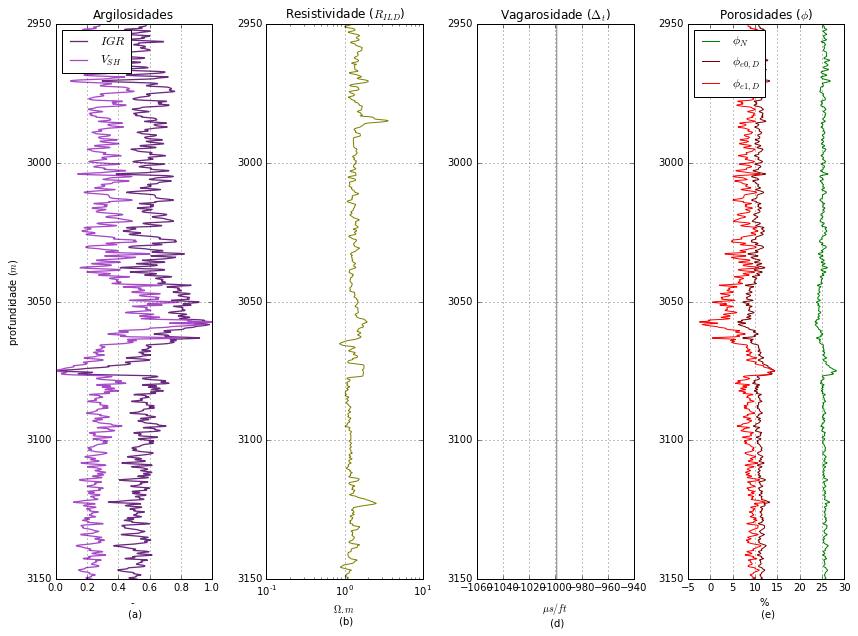

In [4]:
#
#Raio Gamma
#
IGR = [];VSH = []

for i in range (p):
    IGR0 = (GR[i] - min(GR))/(max(GR) - min(GR)) # Calculo da Argilosidade (basica, Schlumberger) 
    IGR.append(IGR0)
    Larionov0 = 0.083*((2**(3.70*IGR0))-1)       # Correcao de Larionov para Argilosidade
    VSH.append(Larionov0)
    
print(mean(IGR),'media (IGR) - indice de raio gama');print(mean(VSH),' media (VSH) - quantidade de folhelho ')
#
#Porosidade
#
RHOf  = 1.101;DTPf = 189.0;RHOma = 2.65;DTPma = 55.5;RHOsh = 2.56;DTPsh = 85.0
print (RHOma, 'RHOma|',RHOf,'RHOf',DTPma,'DTPm',DTPf,'DTPf')
#------------------------------------------------------------------------------------------------#
PHItd = [];PHIsh = [] # Porosidade total - perfil densidade e Porosidade aparente - folhelho

for i in range (p):
    PHItd0 = (100*(RHOb[i] - RHOma)/(RHOf - RHOma))# Porosidade total - perfil densidade
    PHIsh.append(PHIN[i] - PHItd0)
    PHItd.append(PHItd0)
print ();print (mean(PHItd),' media (PHItd)%');print (mean(PHIsh),' media (PHIsh)%')
#------------------------------------------------------------------------------------------------#
for i in range (p):
    if PHIsh[i] == max(PHIsh):Psh = i
        
print (Psh,' ponto de folhelho (Psh)');RHOsh2 = RHOb[Psh];VPsh2  = 108.8*(RHOsh2**4.0)
DTPsh2 = 1.0/((3.2808*(10**(-6)))*VPsh2)
PHIs0  = 100.0*((DTPsh - DTPma)/(DTPf - DTPma));PHIs1 = 100.0*((DTPsh2 - DTPma)/(DTPf - DTPma))
print (PHIs0,'= porosidade sh tabelada|',PHIs1,'= porosidade sh calculada')
#--------------------------------Porosidade Efetiva Densidade------------------------------------#
PHIed0 = [];PHIed1 = []
for i in range (p):
    PHIed0.append((((RHOb[i] - RHOma)/(RHOf - RHOma)) - ((VSH[i])*(RHOsh  - RHOma)/(RHOf - RHOma)))*100)
    PHIed1.append((((RHOb[i] - RHOma)/(RHOf - RHOma)) - ((VSH[i])*(RHOsh2 - RHOma)/(RHOf - RHOma)))*100)
    
print (mean(PHIed0),'= porosidade D, tabelada|',mean(PHIed1),'= porosidade D, calculada')
#--------------------------------------------------------Graficos------------------------------------------------#
fig, (ax1, ax2, ax4, ax5) = plt.subplots(1,4);fig.suptitle('', fontsize=20);fig.set_size_inches(12, 10)
#--------------------------------------------------------------------------------------------------#
ax1.plot(IGR,prof,'-',linewidth = 1.3,color='#6A287E',label='$IGR$')
ax1.plot(VSH,prof,'-',linewidth = 1.3,color='#A74AC7',label='$V_{SH}$')
ax1.set_title(u'Argilosidades');ax1.set_xlabel('- \n (a)');ax1.set_ylabel('profundidade ($m$)')
ax1.set_ylim(ymax=max(prof),ymin=min(prof));ax1.invert_yaxis();ax1.grid();ax1.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax2.semilogx(ILD,prof,'-',linewidth = 1,color='olive',label='$ILD$')
ax2.set_title(u'Resistividade ($R_{ILD}$)');ax2.set_xlabel('$\Omega.m$ \n (b)')
ax2.set_ylim(ymax=max(prof),ymin=min(prof));ax2.invert_yaxis();ax2.grid()
#--------------------------------------------------------------------------------------------------#
ax4.plot(DTP ,prof,'-',linewidth = 1,color='Gray',label='$V_P$');ax4.set_title('Vagarosidade ($\Delta _t$)')    
ax4.set_xlabel('$\mu s / ft$ \n (d)');ax4.set_ylim(ymax=max(prof),ymin=min(prof));ax4.invert_yaxis();ax4.grid()
#--------------------------------------------------------------------------------------------------#
ax5.plot(PHIN  ,prof,'-',linewidth = 1,color='Green' ,label='$\phi_N$')
ax5.plot(PHIed0,prof,'-',linewidth = 1,color='Maroon',label='$\phi_{e0,D}$')
ax5.plot(PHIed1,prof,'-',linewidth = 1,color='red',label='$\phi_{e1,D}$')
ax5.set_title('Porosidades ($\phi$)');ax5.set_xlabel('% \n (e)');ax5.set_ylim(ymax=max(prof),ymin=min(prof))
ax5.invert_yaxis();ax5.grid();ax5.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
plt.tight_layout();plt.subplots_adjust(top=0.85);plt.show();del(IGR)

<br><center><font face="Times New ROman" size="6" color="#000000">- Perfil Sônico Sintético -</font></center>
<br>
<br>
<br>Augusto(RJS42) - $V_p(\phi_{e,D}) = 3.91 - 5.52 \phi_{e,D} + 14.37 \phi_{e,D}^2 $

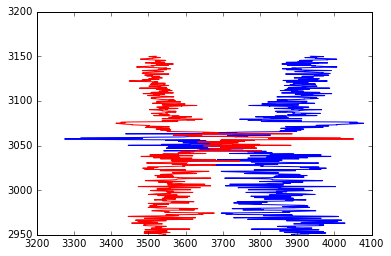

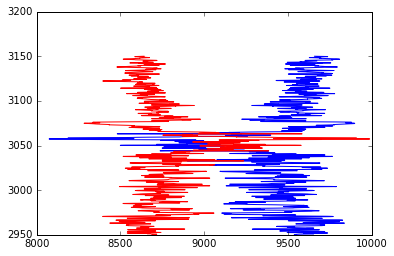

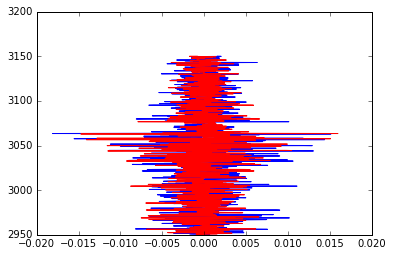

In [5]:
#---------------------------------------------------Estimando VP-------------------------------------------------#
cfvp = 3.2808*(10**(-6)) # conversao us/ft -> s/m
#------------------------------------------------Modelo Petrofisico----------------------------------------------#
DTPp = [];VPp=[]
for i in range (p):
    DTPp0 = (DTPma + (DTPf - DTPma)*((PHIed0[i]/100.0)+(VSH[i]*(PHIs0/100.0))));DTPp.append(DTPp0)
    VPp0 = (1.00/(cfvp*DTPp0));VPp.append(VPp0)
#--------------------------------------------------Modelo Empirico-----------------------------------------------#
VPe1=[]

for i in range (p): # determinando VPa em ms
    VPe1.append(1000*(3.91 - (5.52*(PHIed1[i]/100.0)) + (14.37*((PHIed1[i]/100)**2))))
#-----------------------------------------------------Graficos--------------------------------------------------#
plt.plot(VPp ,prof,'-b',linewidth = 1);plt.plot(VPe1,prof,'-r',linewidth = 1);
plt.show()
#--------------------------------------Impedancia---(transformado de pe pra m)-----------------------------------#
RHOsi = []

for i in range (p):
    RHOsi.append(RHOb[i]*0.001) # convertendo de g/cm3 para Kg/m3 (S.I.)
#------------------------------------------------------Impedancia Acustica---------------------------------------#
z_imp_e = [];z_imp_p = [] # Impedancias acusticas(m/s).(g/cm3)
Ze = [];Zp = [] # Impedancias acusticas (Km/s).(g/cm3)

for i in range (p):
    z_imp0e= (RHOsi[i]*VPe1[i]);z_imp_e.append(z_imp0e);Ze.append(z_imp0e*1000.000)
    z_imp0p= (RHOsi[i]*VPp [i]);z_imp_p.append(z_imp0p);Zp.append(z_imp0p*1000.000)
    #------------------------------------------------------------------------------------------------------------#
plt.plot(Zp,prof,'-b',linewidth = 1);plt.plot(Ze,prof,'-r',linewidth = 1);plt.show()
#-----------------------------------------------Refletividades---------------------------------------------------#
Rp = [];Re = [] # Refletividades

for i in range (p):
    if i == 0:
        RRp= 0;RRe= 0
    if i != 0:
        RRp= (z_imp_p[i-1] - z_imp_p[i])/(z_imp_p[i-1] + z_imp_p[i])
        RRe= (z_imp_e[i-1] - z_imp_e[i])/(z_imp_e[i-1] + z_imp_e[i])
    Rp.append(RRp);Re.append(RRe)
    
zero_bar = [0]*p
#-------------------------------------------------------------------------------------------------------------#
plt.plot(Rp,prof,'-b',linewidth = 1);plt.plot(Re,prof,'-r',linewidth = 1);plt.show()

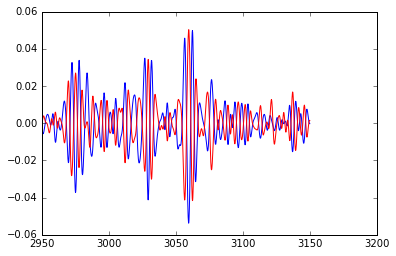

In [6]:
#----------------------------------------------Amplitude Sismica--------------------------------------------------#
DL = prof[3]-prof[2];Tp = [];Te = [];f = 600

for i in range (p):
    Tp.append(DL/VPp[i]);Te.append(DL/VPe1[i])
    
TTP = np.cumsum(Tp);TTE = np.cumsum(Te)

signalp = []
for j in range (p):
    wavkp = []
    for i in range (len(TTP)):
        EE1p = -(np.pi**2)*(f**2)*((TTP[j] - TTP[i])**2)
        wav0p = Rp[i]*(1 - (2*(np.pi**2)) * (f**2) * ((TTP[j] - TTP[i])**2))*np.exp(EE1p);wavkp.append(wav0p)
    FXO1p = np.sum(wavkp)
    signalp.append(FXO1p)
    
signale = []
for j in range (p):
    wavke = []
    for i in range (len(TTE)):
        EE1e = -(np.pi**2)*(f**2)*((TTE[j] - TTE[i])**2)
        wav0e = Re[i]*(1 - (2*(np.pi**2)) * (f**2) * ((TTE[j] - TTE[i])**2))*np.exp(EE1e);wavke.append(wav0e)
    FXO1e = np.sum(wavke)
    signale.append(FXO1e)
    
plt.plot(prof,signalp,'-b');plt.plot(prof,signale,'-r');plt.show()

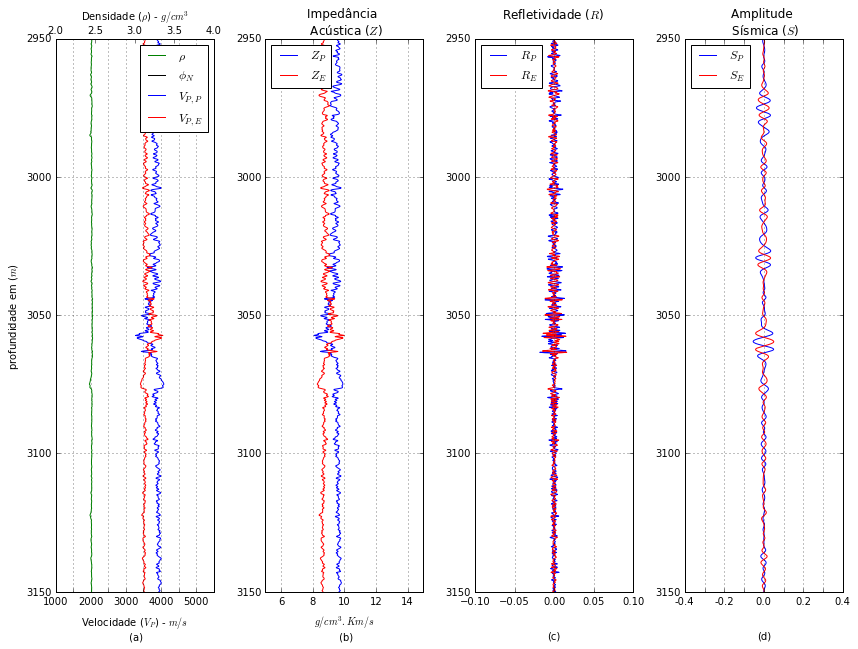

In [7]:
#--------------------------------------------------------------------------------------------------#
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4);fig.set_size_inches(12, 10)
#--------------------------------------------------------------------------------------------------#
lab1=ax1.plot(PHIN,prof,'-k',linewidth=1,label='$\phi_N$')
lab2=ax1.plot(VPp,prof,'-b',linewidth =1,label='$V_{P,P}$')
lab3=ax1.plot(VPe1,prof,'-r',linewidth=1,label='$V_{P,E}$');ax1.set_ylabel('profundidade em ($m$)');ax0=ax1.twiny()

lab0 = ax0.plot(RHOb,prof,'-g',linewidth = 1,label='$\\rho$');ax0.set_xlabel('Densidade ($\\rho$) - $g/cm^3$')
ax1.set_xlabel('Velocidade ($V_P$) - $m/s$ \n (a)');labf = lab0+lab1+lab2+lab3;labs=[l.get_label()for l in labf]
plt.legend(labf, labs, loc=0);ax1.set_ylim(ymax=max(prof),ymin=min(prof));ax1.set_xlim(xmax=5500,xmin=1000)
ax0.set_xlim(xmax=4,xmin=2);ax1.invert_yaxis();ax1.grid()
ax1.set_xticklabels([1000," ",2000," ",3000," ",4000," ",5000," "])
#--------------------------------------------------------------------------------------------------#
ax2.plot(z_imp_p,prof,'-b',linewidth = 1,label='$Z_{P}$')
ax2.plot(z_imp_e,prof,'-r',linewidth = 1,label='$Z_{E}$')         

ax2.set_title(u'Impedância \n Acústica ($Z$)');ax2.set_xlabel('$g/cm^3 . Km/s$ \n (b)')
ax2.set_ylim(ymax=max(prof),ymin=min(prof));ax2.set_xlim(xmax=15,xmin=5);ax2.invert_yaxis();ax2.grid()
ax2.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax3.plot(Rp,prof,'-b',linewidth = 1,label='$R_{P}$') 
ax3.plot(Re,prof,'-r',linewidth = 1,label='$R_{E}$');ax3.set_title('Refletividade ($R$) \n')
ax3.set_xlabel('(c)');ax3.xaxis.set_label_coords(0.5, -0.07);ax3.set_ylim(ymax=max(prof),ymin=min(prof))
ax3.set_xlim(xmax=0.1,xmin=-0.1);ax3.invert_yaxis();ax3.grid();ax3.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax4.plot(signalp,prof,'-b',linewidth = 1,label='$S_P$')
ax4.plot(signale,prof,'-r',linewidth = 1,label='$S_E$');ax4.set_title(u'Amplitude \n Sísmica ($S$)')
ax4.set_xlabel('(d)');ax4.xaxis.set_label_coords(0.5, -0.07);ax4.set_ylim(ymax=max(prof),ymin=min(prof))
ax4.set_xlim(xmax=0.4,xmin=-0.4);ax4.invert_yaxis();ax4.set_xticklabels([-0.4," ",-0.2," ",0.0," ",0.2," ",0.4])
ax4.grid();ax4.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
plt.tight_layout();plt.subplots_adjust(top=0.85);plt.show()

name_b = '../../mario_tese/Figs/pocos/RJS'+name0+'perfil2.png';transparent=True
fig.savefig(name_b, dpi=100, transparent=True, bbox_inches='tight')

In [8]:
X = [351461]*p
Y = [7517956]*p

#-----------Nota: caso o sonico nao exista, os valores de augusto e siqueira sao os originais.
#-----------Caso contrario, sao os modelos testados

filef = np.array([[-999.000]*14]*p)
filef[:,0] = X
filef[:,1] = Y
filef[:,2] = prof   # profundidade
filef[:,3] = DTPp   # sonico 
filef[:,4] = GR     # gama ray
filef[:,5] = ILD    # resistividade
filef[:,6] = PHIN   # porosidade neutronica
filef[:,7] = RHOb   # densidade

#----------------Siqueira----------------------#

filef[:,8]  = z_imp_p # Impedancia acustica
filef[:,9]  = Rp      # Refletividade
filef[:,10] = signalp # Sismograma sintetico

#----------------Augusto-----------------------#

filef[:,11]= z_imp_e # Impedancia acustica
filef[:,12]= Re      # Refletividade
filef[:,13]= signale # Sismograma sintetico

np.savetxt('../banco_de_dados_mario/na24_mario.dat', filef, delimiter=' ', fmt='%.4f')